#Setting Up Your Environment

In [1]:
!pip install yfinance pandas numpy matplotlib


#Importing Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Selecting Your Portfolio

In [3]:
tickers = ['AAPL', 'JNJ', 'JPM', 'PG', 'XOM']


# Fetching Historical Data

In [4]:
data = yf.download(tickers, start='2020-01-01', end='2021-01-01')['Adj Close']


[*********************100%%**********************]  5 of 5 completed


#**Data Preparation**

#Calculate Daily Returns

In [5]:
daily_returns = data.pct_change()


#Clean the Data


In [6]:
daily_returns = daily_returns.dropna()  # Remove any NaN values that may have appeared from the pct_change operation


#Portfolio Weights

In [7]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])


#Portfolio Returns

In [8]:
portfolio_returns = daily_returns.dot(weights)


#Choosing VaR Calculation Method

#**We chose the Historical Simulation method**

#Implementing VaR Calculation


#For the Historical Simulation method:

In [9]:
VaR_95 = np.percentile(portfolio_returns, 5)  # For a 95% confidence level
print(f"VaR at 95% confidence level: {VaR_95*100}%")


VaR at 95% confidence level: -3.1913879766515225%


#Backtesting the VaR Model

#Visualization of Portfolio Returns Distribution with VaR Threshold

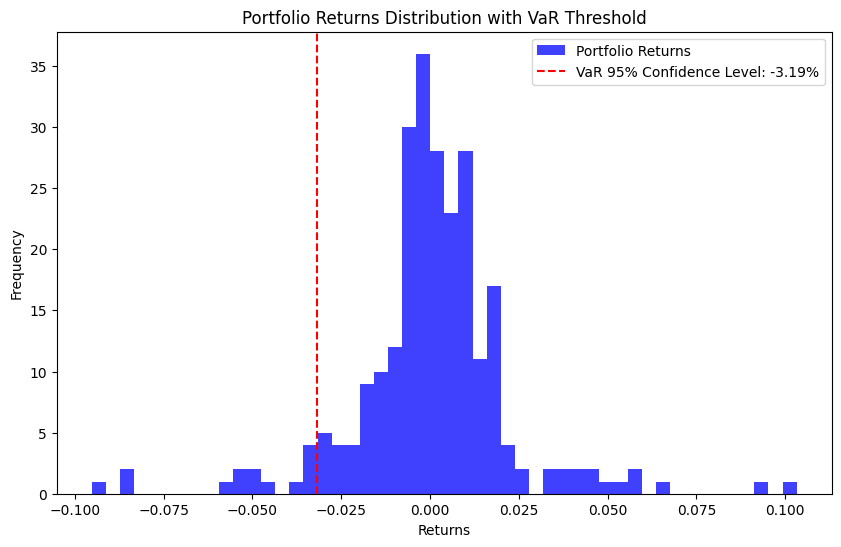

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.75, color='blue', label='Portfolio Returns')
plt.axvline(x=VaR_95, color='red', linestyle='--', label=f'VaR 95% Confidence Level: {VaR_95*100:.2f}%')
plt.title('Portfolio Returns Distribution with VaR Threshold')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#Visualization of Exceedances

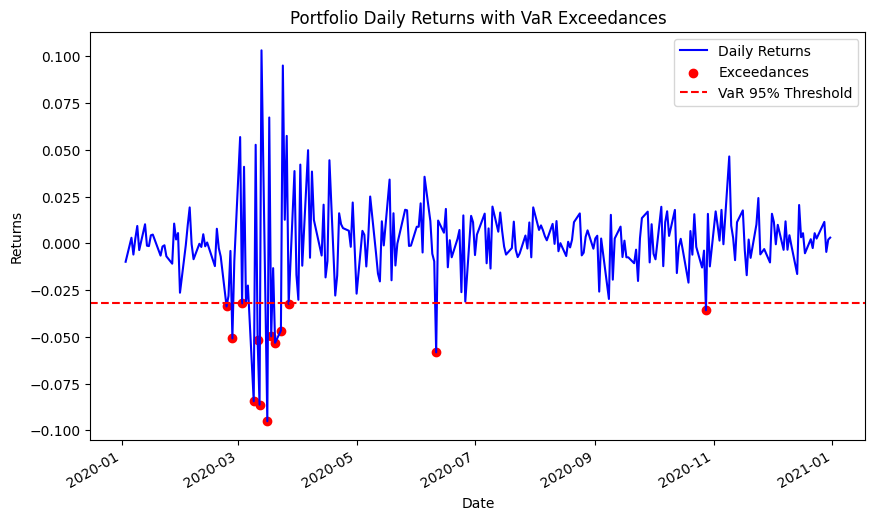

In [14]:
exceedance_days = portfolio_returns[portfolio_returns < VaR_95]

plt.figure(figsize=(10, 6))
portfolio_returns.plot(color='blue', label='Daily Returns')
plt.scatter(exceedance_days.index, exceedance_days.values, color='red', label='Exceedances')
plt.axhline(y=VaR_95, color='red', linestyle='--', label='VaR 95% Threshold')
plt.title('Portfolio Daily Returns with VaR Exceedances')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


#Identify Actual Percentage Losses

In [10]:
actual_losses = portfolio_returns[portfolio_returns < 0]


In [11]:
exceedances = actual_losses[actual_losses < VaR_95].count()
exceedance_rate = exceedances / len(actual_losses) * 100
print(f"Exceedances: {exceedances}, Exceedance Rate: {exceedance_rate}%")


Exceedances: 13, Exceedance Rate: 10.483870967741936%


#Interpretation of Results
**VaR at -3.19%**: This means there's a 95% confidence level that the portfolio will not lose more than 3.19% of its value over the given period, based on historical data. It's a measure of the maximum expected loss under normal market conditions.
**Exceedance Rate of 10.48%:** This rate is higher than the expected 5% for a 95% confidence level VaR. It suggests that the actual losses exceeded the VaR estimate more frequently than anticipated, indicating the model may be underestimating the risk.